# Exploratory Data Analysis

Before preprocessing the data, we conducted an exploratory data analysis to understand the data from each individual source. The EDA consists of the following steps:
1. Box plots of headline length
2. Distribution of sentiments
3. Word clouds for each sentiment



### Imports

In [1]:
import numpy as np
import pandas as pd 
import os

#For data visualization
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


## Load Data

(4846, 2)   Sentiment                                           Headline
0   neutral  According to Gran , the company has no plans t...
1   neutral  Technopolis plans to develop in stages an area...
2  negative  The international electronic industry company ...
3  positive  With the new production plant the company woul...
4  positive  According to the company 's updated strategy f...


<AxesSubplot: >

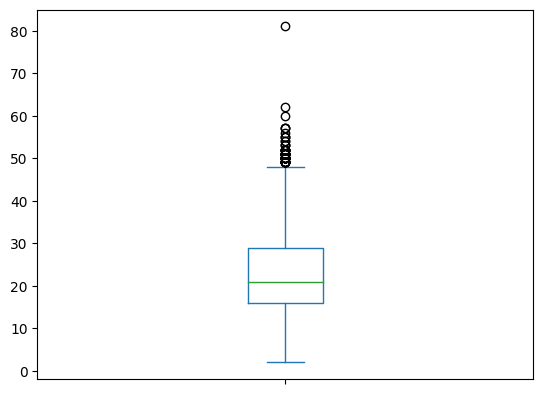

In [19]:
# Load FINANCE data
finance_data = pd.read_csv('../data/finance_data/all-data.csv', names=['Sentiment','Headline'], encoding='latin-1')
# Output first five rows
print(finance_data.shape, finance_data.head())

# Calculate headline lengths
headline_len = pd.Series([len(headline.split()) for headline in finance_data['Headline']])

# The distribution of headline text lengths
headline_len.plot(kind='box')

(4072, 2)                                             Headline  Sentiment
0  Coronavirus cases reach 2,438 in Rajasthan; 81...          0
1  Coronavirus cases in Delhi surge to 3,439 afte...          0
2  Anguished, I'll always recall our interactions...          1
3  It's a terrible week for Indian cinema: Rahul ...          0
4  Delhi Police perform 'parikrama' of AIIMS to t...          1


<AxesSubplot: >

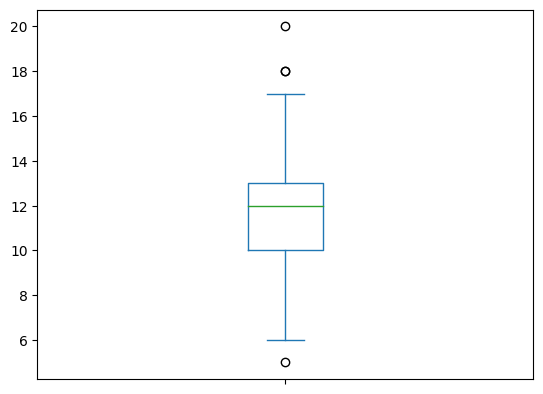

In [20]:
# Load COVID data
## positive sentiment is represented by '1' and negative sentiment by '0
covid_data = pd.read_csv('../data/covid_data/raw_data.csv', usecols = ['Sentiment','Headline'], encoding='latin-1')

# Output first five rows
print(covid_data.shape, covid_data.head())

covid_data['Sentiment'] = covid_data['Sentiment'].map({0: 'negative', 1: 'positive'})

# Calculate headline lengths
headline_len = pd.Series([len(headline.split()) for headline in covid_data['Headline']])

# The distribution of headline text lengths
headline_len.plot(kind='box')

(1271, 2)                                             headline majority_label
0  Boris Johnson Joins Trump in Redefining Conser...          neutr
1       Trump Praises Controversial Hungarian Leader            neg
2  Stung by Trumpâs Criticisms of Russian Gas D...          neutr
3  What âAmerica Firstâ Means Under Trump Is ...          neutr
4    Trump Calls for NATO Expansion Into Middle East            pos


<AxesSubplot: >

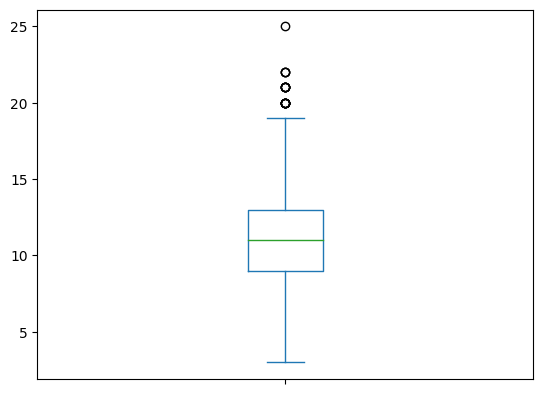

In [21]:
# Load SEN_R data
sen_R_data = pd.read_csv('../data/sen_data/SEN_en_R.csv', usecols = ['majority_label','headline'], encoding='latin-1')

# Output first five rows
print(sen_R_data.shape, sen_R_data.head())

sen_R_data = sen_R_data.rename(columns = {"majority_label": "Sentiment", "headline": "Headline"})
sen_R_data['Sentiment'] = sen_R_data['Sentiment'].map({'neg': 'negative', 'pos': 'positive', 'neutr': 'neutral'})

# Calculate headline lengths
headline_len = pd.Series([len(headline.split()) for headline in sen_R_data['Headline']])

# The distribution of headline text lengths
headline_len.plot(kind='box')

(1361, 2)                                             headline majority_label
0  Russia and Poland Feud Over Putin Remarks on W...            neg
1  Trump Moves to Lift Visa Restrictions on Polis...          neutr
2  Trump-Backed U.S.-British Trade Deal Faces Hur...          neutr
3    Trump Praises Lame-Duck U.K. Leader Theresa May          neutr
4  Trumpâs Arrival in London Brings Controversy...            neg


<AxesSubplot: >

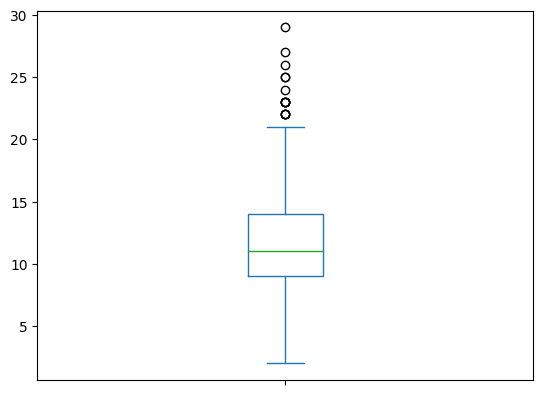

In [17]:
# Load SEN_AMT data
sen_AMT_data = pd.read_csv('../data/sen_data/SEN_en_AMT.csv', usecols = ['majority_label','headline'], encoding='latin-1')

# Output first five rows
print(sen_AMT_data.shape, sen_AMT_data.head())

sen_AMT_data = sen_AMT_data.rename(columns = {"majority_label": "Sentiment", "headline": "Headline"})
sen_AMT_data['Sentiment'] = sen_AMT_data['Sentiment'].map({'neg': 'negative', 'pos': 'positive', 'neutr': 'neutral'})

# Calculate headline lengths
headline_len = pd.Series([len(headline.split()) for headline in sen_AMT_data['Headline']])

# The distribution of headline text lengths
headline_len.plot(kind='box')

In [6]:
# Combine all data sets

data = pd.concat([finance_data,covid_data,sen_R_data,sen_AMT_data], ignore_index=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11550 entries, 0 to 11549
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  11499 non-null  object
 1   Headline   11550 non-null  object
dtypes: object(2)
memory usage: 180.6+ KB


## Distribution of sentiments & length of headlines

In [7]:
# Check for missing data
data.isnull().sum()

Sentiment    51
Headline      0
dtype: int64

<AxesSubplot: xlabel='Sentiment'>

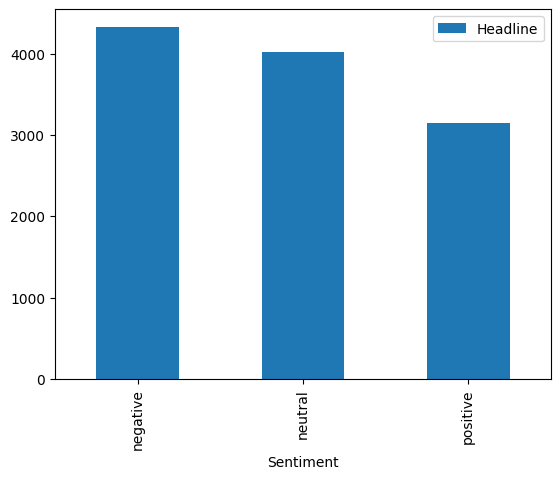

In [8]:
# The distribution of sentiments
data.groupby('Sentiment').count().plot(kind='bar')

<AxesSubplot: >

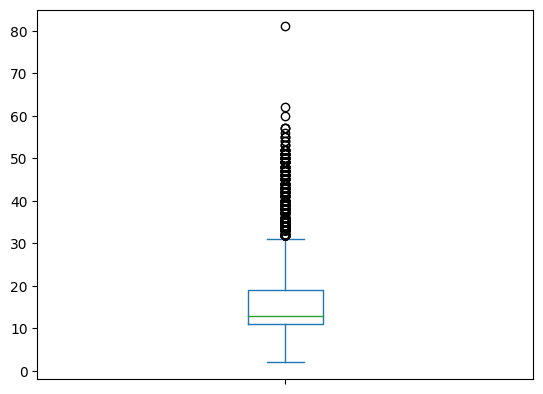

In [9]:
# Calculate headline lengths
headline_len = pd.Series([len(headline.split()) for headline in data['Headline']])

# The distribution of headline text lengths
headline_len.plot(kind='box')

## Wordclouds

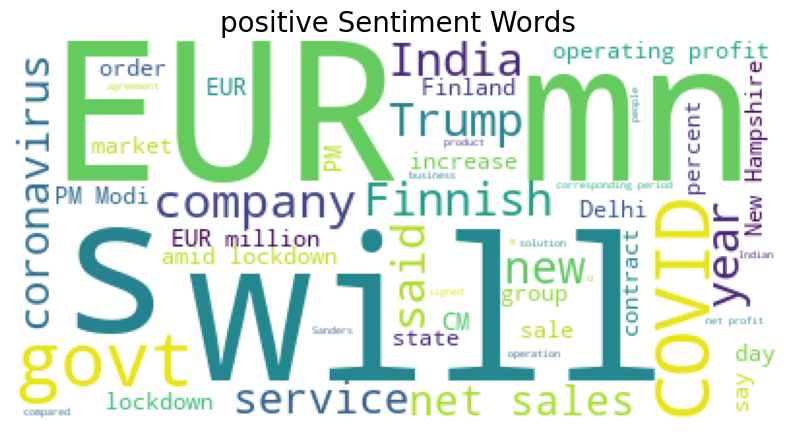

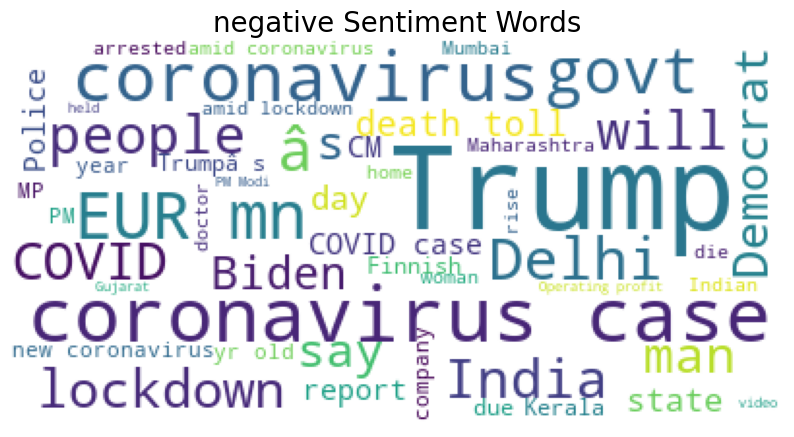

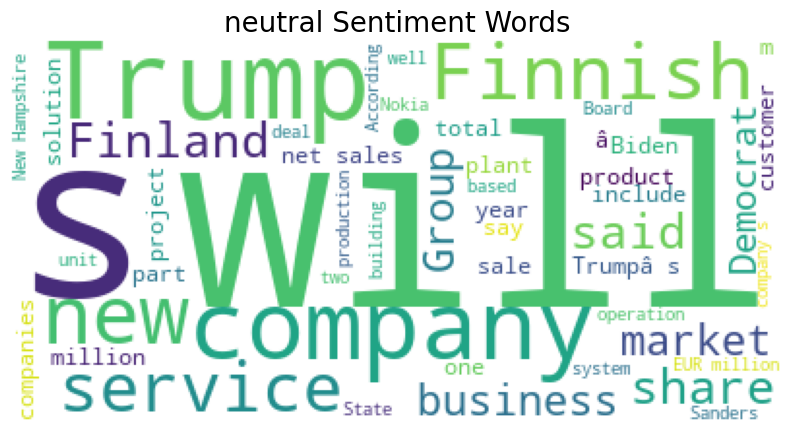

In [10]:
# Visualizing data into wordclouds


from wordcloud import WordCloud, STOPWORDS

def wordcount_gen(df, category):
    '''
    Generating Word Cloud
    inputs:
       - df: tweets dataset
       - category: Positive/Negative/Neutral
    '''
    # Combine all tweets
    combined_tweets = " ".join([tweet for tweet in df[df.Sentiment==category]['Headline']])
                          
    # Initialize wordcloud object
    wc = WordCloud(background_color='white', 
                   max_words=50, 
                   stopwords = STOPWORDS)

    # Generate and plot wordcloud
    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_tweets))
    plt.title('{} Sentiment Words'.format(category), fontsize=20)
    plt.axis('off')
    plt.show()
    
# Positive tweet words
wordcount_gen(data, 'positive')
     
# Negative tweet words
wordcount_gen(data, 'negative')
     
# Neutral tweet words
wordcount_gen(data, 'neutral')